# Census_Analysis

This is a python code to analyze, '2015 US Census Demographic Data', downloaded from "https://www.kaggle.com/code/zimeiyang/2015-us-census-demographic-data/data". We are using Pandas dataframe to work with data which is in the form of .CSV file. 

1. Number of states in USA
2. number oof counties in each state
3. Total population of USA
4. List 5 counties with highest population, with bar chart.
6. List 5 states with highest population, with bar chart.
7. List 5 counties and states with highest work from home people.
8. List 5 counties and state with highest unemployment
9. Which 5 states have highest gender ratio (man/women)?
10. Which 5 states have highest and lowest white population?
11. Is there any correlation between income and race (White/ Asian/ ... )? 
12. Is there any correlation between income and Work at home?
13. Is there any correlation between income and Private Work?
14. In counties with high Asian population, do you find the average wage to be higher than counties with high Black or White or Hispanic population? 
15. In counties with high population, do you find lower income than counties with low population? 

. 

In [2]:
import pandas as pd

census_data=pd.read_csv("acs2015_census_tract_data.csv")

In [3]:
census_data.head(5)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [4]:
#Number of states in USA

states=census_data.State.unique()
print("Number of states in USA: ",len(states))

Number of states in USA:  52


In [6]:
#number oof counties in each state

state_county= census_data[['State','County']].drop_duplicates()
num_counties=state_county.groupby(['State']).County.count()
print("number oof counties in each state: ",num_counties)

In [7]:
census_data.TotalPop.sum() # Total population of USA

320098094

In [28]:
#List 5 counties with highest population

counties_highest_pop=census_data[['County','TotalPop']]
chp=counties_highest_pop.groupby(['County']).TotalPop.sum()
chigh_pop=chp.sort_values(ascending=False).head(5).reset_index()
chigh_pop

,County,TotalPop
0,Los Angeles,10038388
1,Cook,5258620
2,Orange,5025603
3,Harris,4389138
4,Maricopa,4018143


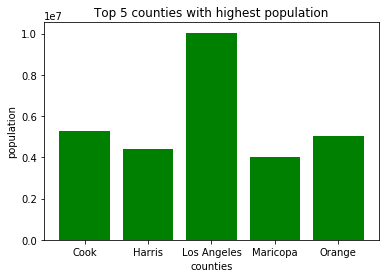

In [31]:
import matplotlib.pyplot as plt


counties=list(chigh_pop.iloc[:, 0])
popul= list(chigh_pop.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(counties, popul, color='g')
plt.title("Top 5 counties with highest population")
plt.xlabel("counties")
plt.ylabel("population")
plt.show()

In [20]:
#List 5 states with highest population

states_high_pop=(census_data.groupby(['State']).TotalPop.sum()).sort_values(ascending=False)
states_high_pop.head(5)

State
California    38421464
Texas         26538614
New York      19673174
Florida       19645772
Illinois      12873761
Name: TotalPop, dtype: int64

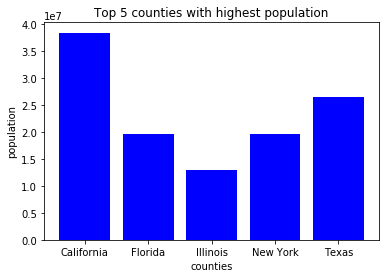

In [35]:
shigh_pop=(states_high_pop.head(5)).reset_index()

states=list(shigh_pop.iloc[:, 0])
popul= list(shigh_pop.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(states, popul, color='b')
plt.title("Top 5 counties with highest population")
plt.xlabel("counties")
plt.ylabel("population")
plt.show()

In [115]:
#List 5 counties and states with highest work from home people

((census_data.groupby(['State','County']).WorkAtHome.sum()).sort_values(ascending=False)).head(5)

State       County     
California  Los Angeles    12024.3
Illinois    Cook            5462.9
Arizona     Maricopa        5444.6
California  San Diego       4141.1
            Orange          3129.5
Name: WorkAtHome, dtype: float64

In [117]:
#List 5 counties and state with highest unemployment

((census_data.groupby(['State','County']).Unemployment.sum()).sort_values(ascending=False)).head(5)

State       County     
California  Los Angeles    23931.1
Illinois    Cook           16559.7
Michigan    Wayne          10682.7
New York    Kings           7469.0
Arizona     Maricopa        7426.4
Name: Unemployment, dtype: float64

In [128]:
#Which 5 states have highest gender ratio (man/women)?

men_count=census_data.groupby(['State']).Men.sum()
women_count=census_data.groupby(['State']).Women.sum()
(men_count/women_count).sort_values(ascending=False).head(5)

State
Alaska          1.100067
North Dakota    1.040393
Wyoming         1.040276
Hawaii          1.019303
Nevada          1.012103
dtype: float64

In [145]:
##Which 5 states have highest and lowest white population?

white_pop=(census_data.groupby(['State']).White.sum()).sort_values(ascending=False)
print("\n----------Top 5 states with hightest white population----------\n")
white_pop.head(5)


----------Top 5 states with hightest white population----------



State
California      322208.9
New York        274275.3
Pennsylvania    247783.1
Florida         246497.4
Texas           233583.7
Name: White, dtype: float64

In [147]:

print("\n----------Top 5 states with lowest white population----------\n")
white_pop=(census_data.groupby(['State']).White.sum()).sort_values()
white_pop.head(5)


----------Top 5 states with lowest white population----------



State
Puerto Rico               686.2
District of Columbia     5925.6
Hawaii                   7910.2
Alaska                  10172.0
Wyoming                 11037.8
Name: White, dtype: float64

In [165]:

#. Is there any correlation between income and race (White/ Asian/ ... )? Y: An avarage Asia earns more than than others


In [248]:
hisp=(census_data.TotalPop*census_data.Hispanic)/100
total_hisp=hisp.sum()

In [253]:
per_hisp_income=census_data.Income/hisp


In [250]:
hisp_total_income=hisp*census_data.IncomePerCap
hisp_total_income.sum()/ total_hisp

22290.137478555018

In [254]:
whit=(census_data.TotalPop*census_data.White)/100
total_whit=whit.sum()
per_whit_income=census_data.Income/whit
whit_total_income=whit*census_data.IncomePerCap

whit_total_income.sum()/ total_whit

31435.093194174

In [255]:
blac=(census_data.TotalPop*census_data.Black)/100
total_blac=blac.sum()
per_blac_income=census_data.Income/blac
blac_total_income=blac*census_data.IncomePerCap

blac_total_income.sum()/ total_blac

22490.830632912017

In [256]:
nati=(census_data.TotalPop*census_data.Native)/100
total_nati=nati.sum()
per_nati_income=census_data.Income/nati
nati_total_income=nati*census_data.IncomePerCap

nati_total_income.sum()/ total_nati

21938.33985415625

In [257]:
asia=(census_data.TotalPop*census_data.Asian)/100
total_asia=asia.sum()
per_asia_income=census_data.Income/asia
asia_total_income=asia*census_data.IncomePerCap

asia_total_income.sum()/ total_asia

34419.280825464055

In [261]:
#Is there any correlation between income and Work at home? Ans- Yes, the income of WorkAtHome is only 75% of the mean Income

wah=(census_data.TotalPop*census_data.WorkAtHome)/100
wah_total_income=wah*census_data.IncomePerCap
wah_total_income.sum()/wah.sum()


33851.49039464008

In [276]:
x=(wah*census_data.Income)/census_data.TotalPop
x.mean()

45125.83835520357

In [281]:
#Is there any correlation between income and Private Work? Ans- Yes, the income of WorkAtHome is around 139.4% of the mean Income

pri_work=(census_data.Employed*census_data.PrivateWork)/100
pri_total_income=pri_work*census_data.IncomePerCap
pri_total_income.sum()/pri_work.sum()

30094.249104212035

In [284]:
x=(pri_work*census_data.Income)/census_data.TotalPop
x.mean()

21584.352678666455

In [296]:
#In counties with high population, do you find lower income than counties with low population?
#Note: If you want to select county with high X, you can select counties which have more than two times the average value of X in county.
    
census_data['TotalIncome']=census_data['IncomePerCap']*census_data['TotalPop']
cd=census_data.groupby(['County']).agg({'TotalIncome':'sum','TotalPop':'sum'}).reset_index()

In [309]:
avg = cd['TotalPop'].mean()
cd['HighPop']=cd['TotalPop']>avg

In [313]:
cd1 = cd.groupby(['HighPop']).agg({'TotalIncome':'sum','TotalPop':'sum'}).reset_index()

In [314]:
cd1['AverageIncome'] = cd1['TotalIncome']/cd1['TotalPop']
cd1

,HighPop,TotalIncome,TotalPop,AverageIncome
0,False,1.463498e+12,61325375,23864.483179
1,True,7.734036e+12,258772719,29887.369911
